In [1]:
print("GET ON WiTH FUNKOT")
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import mglearn                                                                                                              

GET ON WiTH FUNKOT


## One-Hot编码（虚拟变量）

In [2]:
from IPython.display import display

data = pd.read_csv("adult.data",header=None,index_col=False,
                  names=['age','workclass','fnlwgt','education','education-num',
                        'marital-status','occupation','relationship','race','gender',
                        'capital-gain','capital-loss','hours-per-week','native-country','income'])

data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("Original features:\n",list(data.columns),"\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n",list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
#将DataFrame转换成NumPy
#只提取特征不提取目标！
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score: {:.2f}".format(logreg.score(X_test,y_test)))

Test score: 0.81


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### pandas 的 get_dummies 将所有数字都看成连续的，若要分类需转成字符串

In [8]:
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1],
                       'Categorical Feature':['socks','fox','socks','box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [10]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
#pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature'])
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 分箱

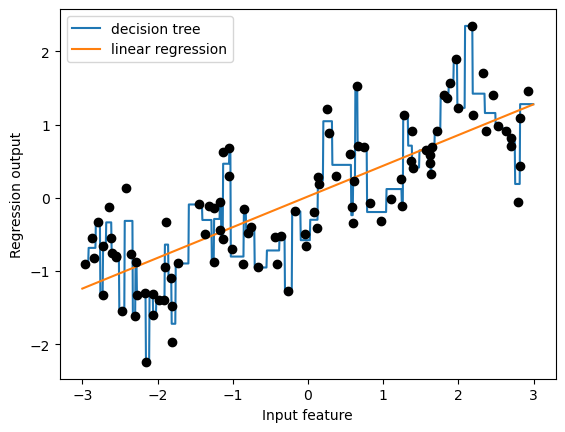

In [11]:
#在wave数据集上比较线性回归和决策树回归
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [12]:
#分箱离散化
bins = np.linspace(-3,3,11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
which_bin = np.digitize(X,bins=bins)
print("\nData points:\n",X[:5])
print("\nBin membership for data points:\n",which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


line_binned.shape: (1000, 10)


Text(0.5, 0, 'Input feature')

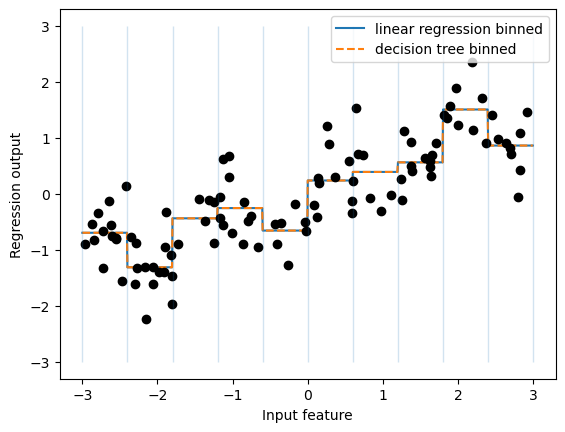

In [16]:
line_binned = encoder.transform(np.digitize(line,bins=bins)) #line是-3到3的1000个点
print("line_binned.shape: {}".format(line_binned.shape))

reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'--',label='decision tree binned')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
#虚线和实线完全重合
#每个箱子都预测一个常数值

## 交互特征与多项式特征

In [17]:
#加入x轴，得到11维数据
X_combined = np.hstack([X,X_binned])
line_combined = np.hstack([line,line_binned])
print(X_combined.shape)

(100, 11)


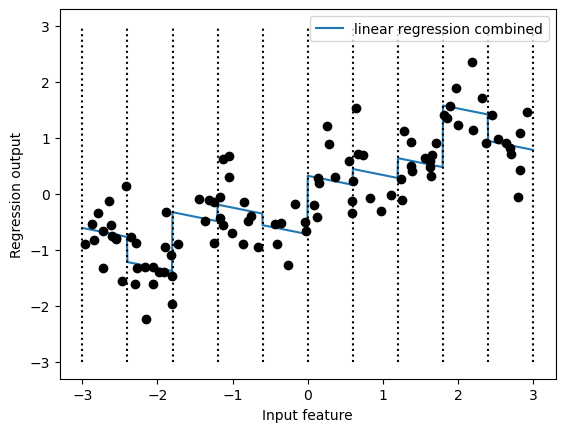

In [18]:
reg = LinearRegression().fit(X_combined,y)

plt.plot(line,reg.predict(line_combined),label='linear regression combined')
#名称取bin没问题？
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

In [19]:
#如果每个箱子都要有不同的斜率
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(100, 20)


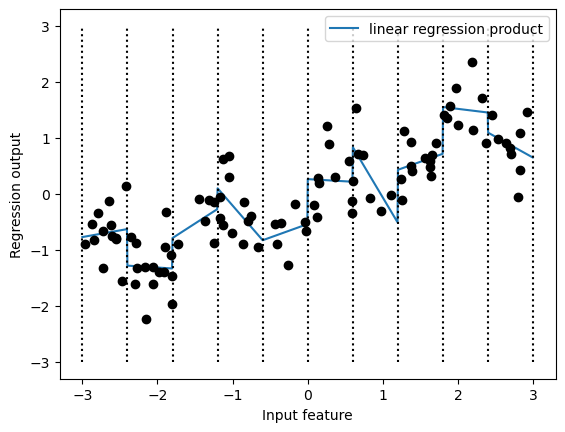

In [20]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [21]:
#尝试只增加2维
X_product = np.hstack([X_binned,X,X ** 2])
print(X_product.shape)

(100, 12)


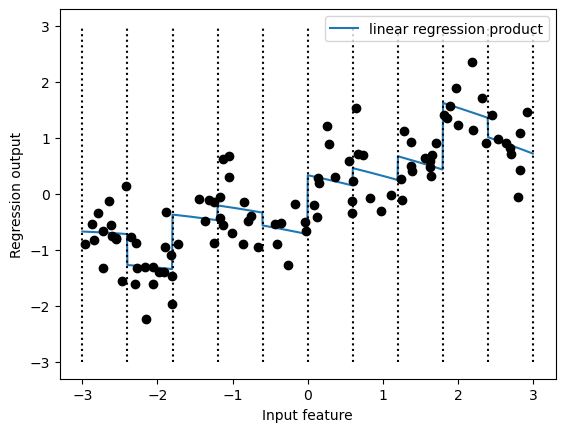

In [22]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned,line,line ** 2])
plt.plot(line,reg.predict(line_product),label='linear regression product')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [23]:
#采用10阶多项式
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [24]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [25]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [26]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


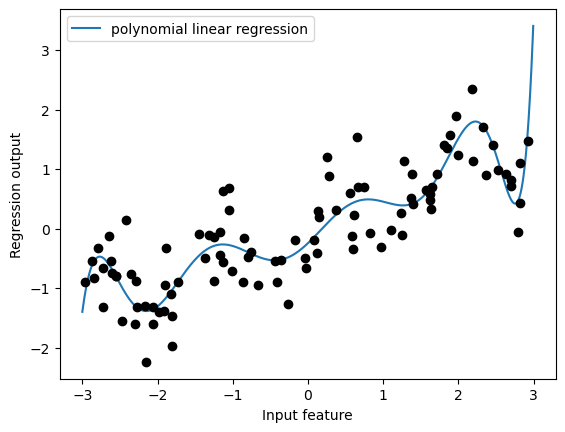

In [27]:
#经典的多项式回归模型
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynomial linear regression')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

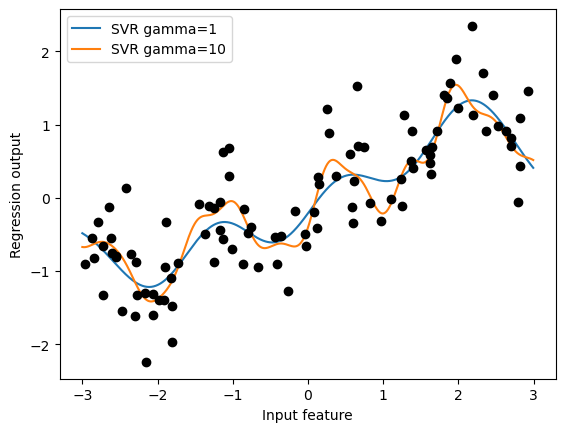

In [28]:
#在原始数据上的核SVM模型
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [29]:
#尝试10阶多项式+分箱
X_product = np.hstack([X_binned,X_poly])
poly.fit(line)
line_poly = poly.transform(line)
line_combined = np.hstack([line_binned,line_poly])
print(X_product.shape)
print(line_combined.shape)

(100, 20)
(1000, 20)


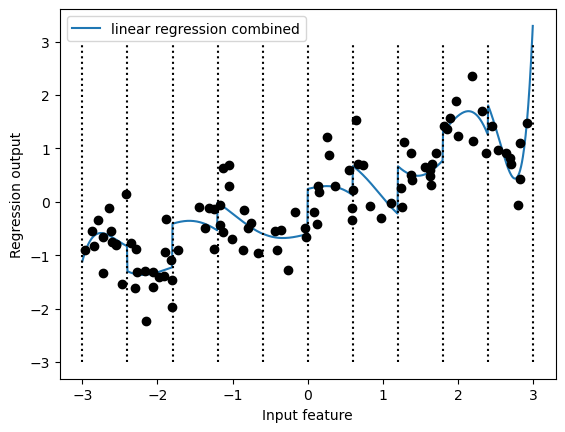

In [30]:
reg = LinearRegression().fit(X_product,y)

plt.plot(line,reg.predict(line_combined),label='linear regression combined')
#名称取bin没问题？
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

In [31]:
#将交互特征和多项式特征应用在波士顿房价
from sklearn.datasets import load_boston
#但是波士顿房价爆炸了

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
#以下是不能运行的,但是能看看
boston = load_boston()
X_train_X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train_scaled)) #(379,13)
print("X_train_poly.shape: {}".format(X_train_poly.shape)) #(379,105)

#get_feature_names
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))
#第一个特征是常数项

#对Ridge在有交互特征的数据上和没有交互特征的数据上的性能对比
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled,y_test))) #0.621
ridge = Ridge().fit(X_train_poly,y_train) 
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly,y_test))) #0.753

#如果使用更加复杂的模型，情况会不同
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled,y_test))) #0.799
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly,y_test))) #0.763

NameError: name 'load_boston' is not defined

## 单变量非线性变换

In [49]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org,w)


In [35]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:,0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


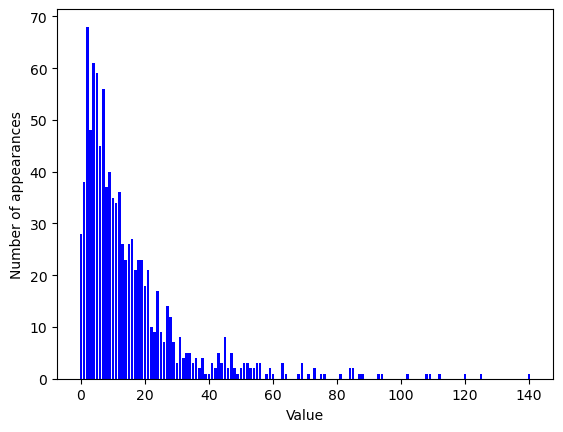

In [38]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

In [50]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


Text(0.5, 0, 'Value')

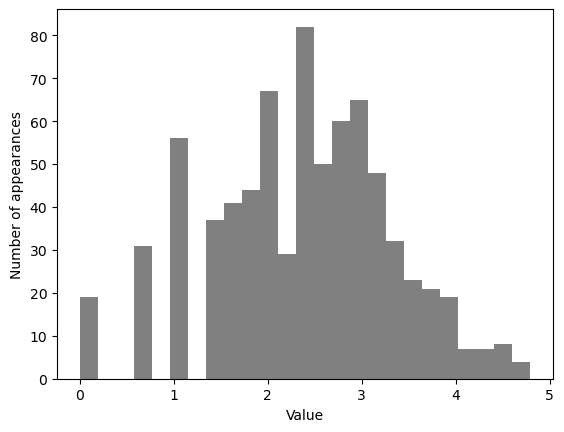

In [52]:
#采用对数
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:,0],bins=25,color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [53]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## 自动化特征选择

### 单变量统计

In [54]:
#在cancer数据集里添加噪声特征，看是否能识别出来
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
#前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data,noise])

X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
#使用f_classif和SelectPercentile来选择50%的特征
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

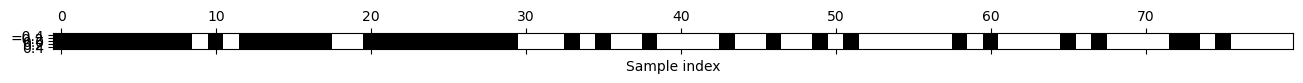

In [55]:
#用get_support查看哪些特征被选中
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")

In [56]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected,y_test)))
#怎么变差了

Score with all features: 0.919
Score with only selected features: 0.912


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### 基于模型的特征选择

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),
                         threshold="median")

In [58]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

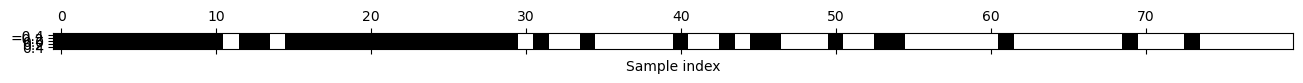

In [59]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")

In [60]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("Test score: {:.3f}".format(score))
#ok

Test score: 0.930


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 迭代特征选择

Text(0.5, 0, 'Sample index')

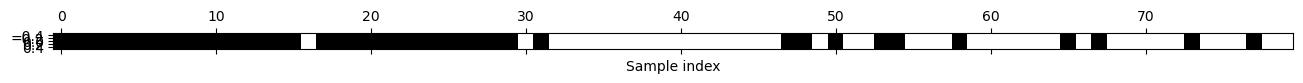

In [61]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),
            n_features_to_select=40)
select.fit(X_train,y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")

In [62]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.926


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 利用专家知识

In [64]:
citibike = mglearn.datasets.load_citibike()

print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\mglearn\datasets.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


Text(0, 0.5, 'Rentals')

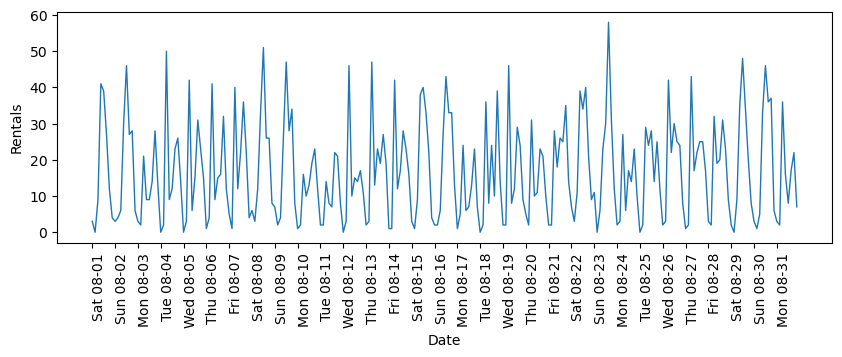

In [65]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime("%a %m-%d"),rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [106]:
y = citibike.values

#X = citibike.index.strftime("%s").astype("int").reshape(-1,1) #strftime("%s")有问题

#pandas的Timestamp(datatime).timestamp()能行
print("%d" % pd.Timestamp(citibike.index[0]).timestamp())
X = [[pd.Timestamp(citibike.index[i]).timestamp()] for i in range(len(citibike.index))]
X = np.array(X).reshape(-1,1)
print(X)
print(X.shape)

1438387200
[[1.4383872e+09]
 [1.4383980e+09]
 [1.4384088e+09]
 [1.4384196e+09]
 [1.4384304e+09]
 [1.4384412e+09]
 [1.4384520e+09]
 [1.4384628e+09]
 [1.4384736e+09]
 [1.4384844e+09]
 [1.4384952e+09]
 [1.4385060e+09]
 [1.4385168e+09]
 [1.4385276e+09]
 [1.4385384e+09]
 [1.4385492e+09]
 [1.4385600e+09]
 [1.4385708e+09]
 [1.4385816e+09]
 [1.4385924e+09]
 [1.4386032e+09]
 [1.4386140e+09]
 [1.4386248e+09]
 [1.4386356e+09]
 [1.4386464e+09]
 [1.4386572e+09]
 [1.4386680e+09]
 [1.4386788e+09]
 [1.4386896e+09]
 [1.4387004e+09]
 [1.4387112e+09]
 [1.4387220e+09]
 [1.4387328e+09]
 [1.4387436e+09]
 [1.4387544e+09]
 [1.4387652e+09]
 [1.4387760e+09]
 [1.4387868e+09]
 [1.4387976e+09]
 [1.4388084e+09]
 [1.4388192e+09]
 [1.4388300e+09]
 [1.4388408e+09]
 [1.4388516e+09]
 [1.4388624e+09]
 [1.4388732e+09]
 [1.4388840e+09]
 [1.4388948e+09]
 [1.4389056e+09]
 [1.4389164e+09]
 [1.4389272e+09]
 [1.4389380e+09]
 [1.4389488e+09]
 [1.4389596e+09]
 [1.4389704e+09]
 [1.4389812e+09]
 [1.4389920e+09]
 [1.4390028e+09]
 [1

In [108]:
n_train = 184

def eval_on_features(features,target,regressor):
    X_train,X_test = features[:n_train],features[n_train:]
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8),xticks.strftime("%a %m-%d"),rotation=90,ha="left")
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="test")
    plt.plot(range(n_train),y_pred_train,'--',label="prediction train")
    plt.plot(range(n_train,len(y_test)+n_train),y_pred,'--',label="prediction test")
    plt.legend(loc=(1.01,0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

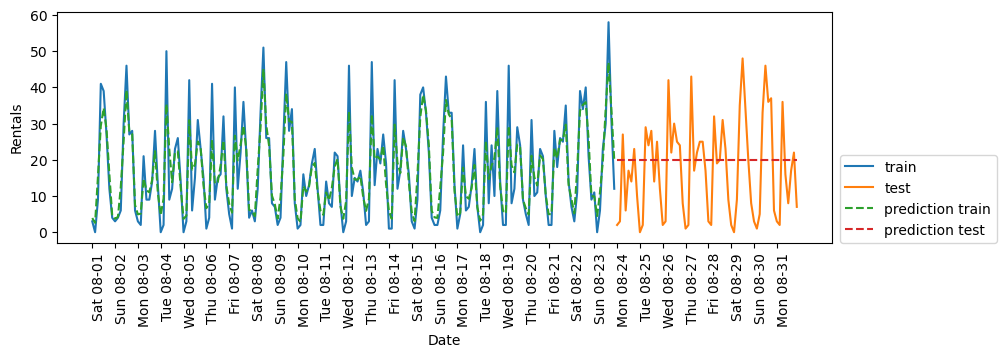

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(X,y,regressor)

Test-set R^2: 0.60


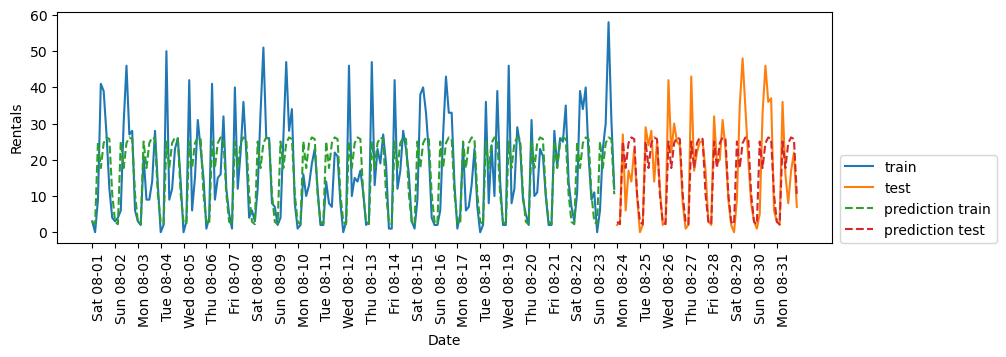

In [114]:
#从POSIX时间中学不到任何东西,删除这个特征
#添加新特征
X_hour = citibike.index.hour
X_hour = np.array(X_hour).reshape(-1,1)
eval_on_features(X_hour,y,regressor)
#每天的时刻作为特征

Test-set R^2: 0.84


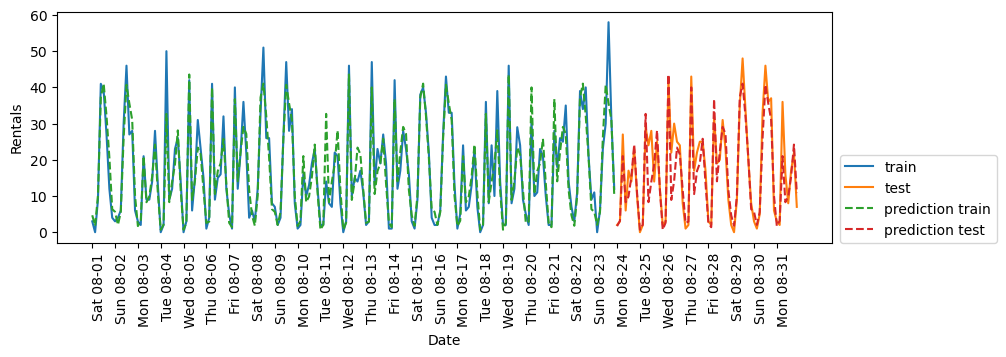

In [115]:
#添加一周的星期几作为特征
X_week = np.array(citibike.index.dayofweek).reshape(-1,1)
X_hour_week = np.hstack([X_week,X_hour])
eval_on_features(X_hour_week,y,regressor)

Test-set R^2: 0.13


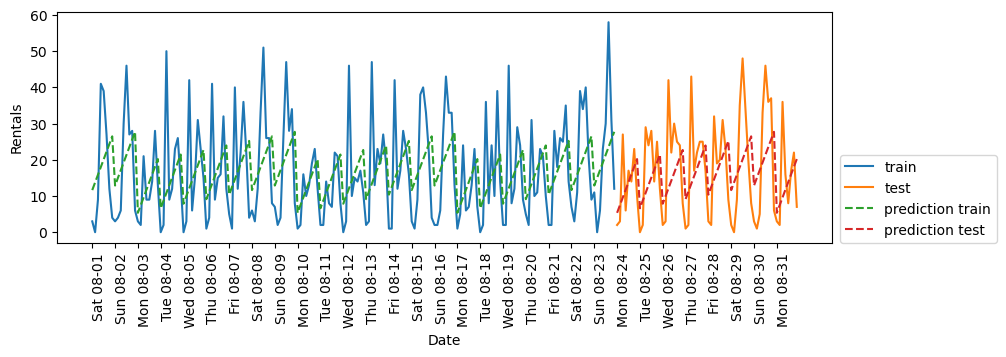

In [116]:
#换LinearRegression试试
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

In [119]:
#效果很差，因为用整数编码的时间被解释为连续变量
#采用OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
print(X_hour_week.shape)
print(X_hour_week_onehot.shape)

(248, 2)
(248, 15)


Test-set R^2: 0.62


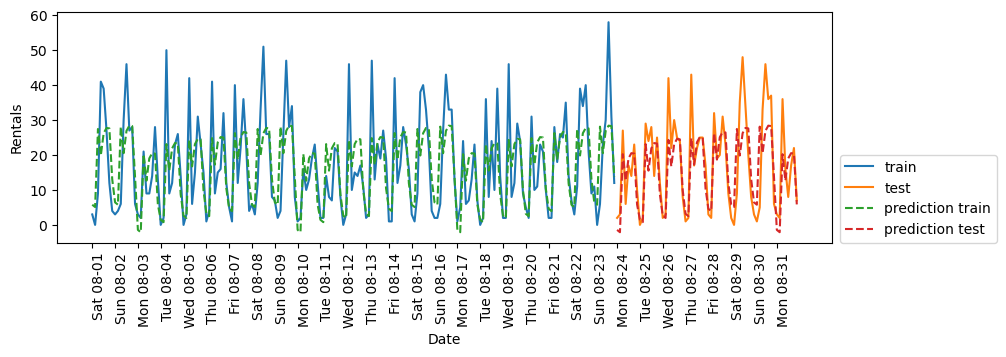

In [122]:
eval_on_features(X_hour_week_onehot,y,Ridge())

X_hour_week_onehot_poly.shape: (248, 120)
Test-set R^2: 0.85


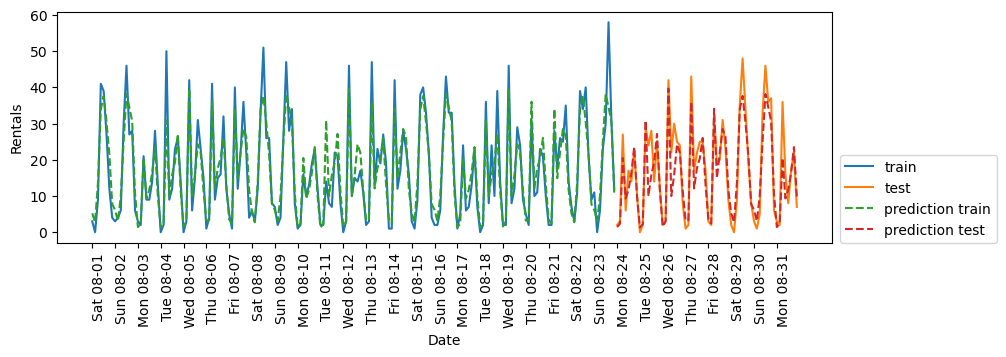

In [123]:
poly_transformer = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
print("X_hour_week_onehot_poly.shape: {}".format(X_hour_week_onehot_poly.shape))
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)
#和随机森林相比该方法的优势是可以输出各交互项的系数

In [124]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
features = day + hour
print(features)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [126]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_!=0]
print(features_poly)
print(features_nonzero)

['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' '00:00' '03:00' '06:00' '09:00'
 '12:00' '15:00' '18:00' '21:00' 'Mon Tue' 'Mon Wed' 'Mon Thu' 'Mon Fri'
 'Mon Sat' 'Mon Sun' 'Mon 00:00' 'Mon 03:00' 'Mon 06:00' 'Mon 09:00'
 'Mon 12:00' 'Mon 15:00' 'Mon 18:00' 'Mon 21:00' 'Tue Wed' 'Tue Thu'
 'Tue Fri' 'Tue Sat' 'Tue Sun' 'Tue 00:00' 'Tue 03:00' 'Tue 06:00'
 'Tue 09:00' 'Tue 12:00' 'Tue 15:00' 'Tue 18:00' 'Tue 21:00' 'Wed Thu'
 'Wed Fri' 'Wed Sat' 'Wed Sun' 'Wed 00:00' 'Wed 03:00' 'Wed 06:00'
 'Wed 09:00' 'Wed 12:00' 'Wed 15:00' 'Wed 18:00' 'Wed 21:00' 'Thu Fri'
 'Thu Sat' 'Thu Sun' 'Thu 00:00' 'Thu 03:00' 'Thu 06:00' 'Thu 09:00'
 'Thu 12:00' 'Thu 15:00' 'Thu 18:00' 'Thu 21:00' 'Fri Sat' 'Fri Sun'
 'Fri 00:00' 'Fri 03:00' 'Fri 06:00' 'Fri 09:00' 'Fri 12:00' 'Fri 15:00'
 'Fri 18:00' 'Fri 21:00' 'Sat Sun' 'Sat 00:00' 'Sat 03:00' 'Sat 06:00'
 'Sat 09:00' 'Sat 12:00' 'Sat 15:00' 'Sat 18:00' 'Sat 21:00' 'Sun 00:00'
 'Sun 03:00' 'Sun 06:00' 'Sun 09:00' 'Sun 12:00' 'Sun 15:00' 'Sun 18:00'
 'Sun 21:0

Text(0, 0.5, 'Feature magnitude')

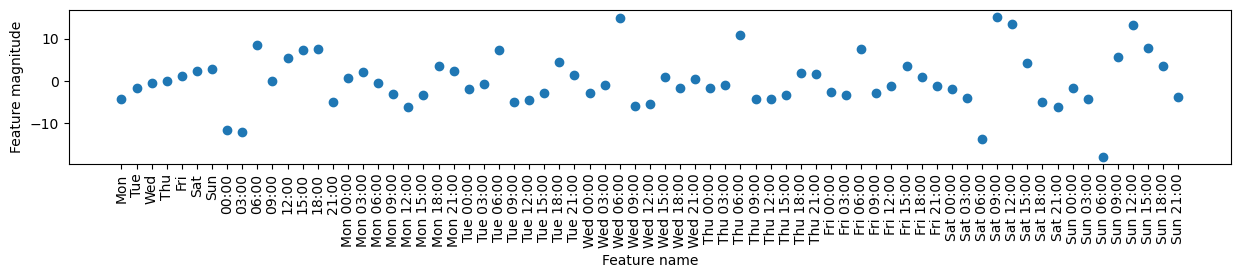

In [127]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)),features_nonzero,rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")